# Exploring the Ising model with Monte Carlo methods
## Konstantinos Doran SN: 22007700
## Introduction:
In this notebook I will be looking at a model system for interacting spins, with a periodic boundary to investigate the effects of altering spins on the energy of the system. The lattice spins will either take 1 or -1. I will select two random particles and swap their spins and investigate the energy difference. I will be using the Metropolis algorithm for checking whether I accept a move that leads to higher energy rather than lower by the given equation:
$$ p = e^{-\Delta E/k_B T}$$
where p is the probability and $\Delta E$ is the change in energy, $k_B$ is the boltzmann constant and T is the temperature of the system

In [28]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### 1. Set up the initial arrangements of spins

This can be taken from the in-class work; plot to check

Text(0.5, 1.0, 'Initial spins')

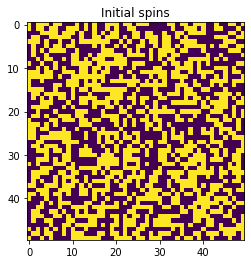

In [39]:
boxlen = 50
B_over_kT = 0.0
J_over_kT = 0.5
spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))
plt.imshow(spins)
plt.title('Initial spins')

### 2. Calculate the energy

In [40]:
sum_neigh_spins = (np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1))
etot = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
print("Starting energy is ",etot)

Starting energy is  148.0


### 3. Write the swap function
For the difference in Energy of the system, we only need to look at what is occuring at each spin location. So taking both location's neighbours' spins, the initial energy is:
$$ E_{initial} = S_1 J \sum {S_{1j}} + S_2 J \sum {S_{2j}} + (S_1 + S_2) B$$
where $S_1$ is the first spin ,  the sum is the sum of the first neighbours, $S_2$ is the second spin and then the sum of the second neighbours, J is the quantum mechanical exchange coupling between spins divided by $k_B T$ and B is the external magnetic field divided by $k_B T$. Our final energy is:
$$ E_{final} = S_2 J \sum {S_{1j}} + S_1 J \sum {S_{2j}} + (S_1 + S_2) B$$
Defining the term:
$$ \Delta Spins = \sum {S_{2j}} - \sum {S_{1j}} $$
We can express the change in energy as:
$$ \Delta E =  (S_2 J \sum {S_{1j}} + S_1 J \sum {S_{2j}} + (S_1 + S_2)B) - (S_1 J \sum {S_{1j}} + S_2 J \sum {S_{2j}} + (S_1 + S_2) B)$$
Which simplified is:
$$ \Delta E = J (S_1 \Delta Spins - S_2 \Delta Spins ) = -J \Delta Spins (S_2 - S_1)$$

In [31]:
def update_swap(i1,j1,i2,j2):
    """Update swap move for Monte Carlo Ising model
    
    Assumes that the 2D array spins is defined externally
    and swaps the spins if the Metropolis criterion is met.
    Inputs:
    i1, j1  Location of  first spin 
    i2, j2  Location of  second spin 

    Output:
    de    Change of energy"""
    #Make indexes periodic
    i1m1 = (i1 - 1)%boxlen
    i1p1 = (i1 + 1)%boxlen
    j1m1 = (j1 - 1)%boxlen
    j1p1 = (j1 + 1)%boxlen
    sum_neigh_spins1 = spins[i1m1,j1] + spins[i1p1,j1] + spins[i1,j1m1] + spins[i1,j1p1]
    i2m1 = (i2 - 1)%boxlen
    i2p1 = (i2 + 1)%boxlen
    j2m1 = (j2 - 1)%boxlen
    j2p1 = (j2 + 1)%boxlen
    sum_neigh_spins2 = spins[i2m1,j2] + spins[i2p1,j2] + spins[i2,j2m1] + spins[i2,j2p1]
    diff_spins = sum_neigh_spins1 - sum_neigh_spins2
    # The change in energy 
    de = -J_over_kT*(diff_spins*(spins[i2,j2]-spins[i1,j1]))
    #print(de)
    # calculate probability of accepting
    p = np.exp(-de)
    if de < 0 or rng.random() < p:
        # Swap spins
        temp = spins[i1,j1]
        spins[i1,j1] = spins[i2,j2]
        spins[i2,j2] = temp
        #print("success")
    else:
        de = 0.0
    return de

### 4. Run the simulation

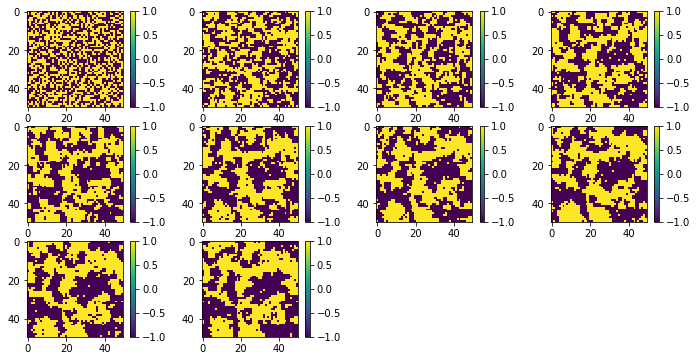

In [41]:
# Initialise parameters
Nsteps = 50000
etot = np.zeros((Nsteps+1))
sum_neigh_spins = (np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
figIsing = plt.figure(figsize=(12,6))
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(boxlen, size=2)
    this_i2, this_j2 = rng.integers(boxlen, size=2)
    # Call swap function
    de = update_swap(this_i1,this_j1,this_i2,this_j2)
    # Calculate new spins and energy
    sum_neigh_spins = (np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    # Plot lattice every 5000 steps
    if i%5000==0:
        ax = figIsing.add_subplot(3,4,index)
        image = ax.imshow(spins,interpolation='none')
        plt.colorbar(mappable=image)
        index +=1 

#plt.imshow(spins)

### 5. Show total energy


The final total energy is: -2.4864 J


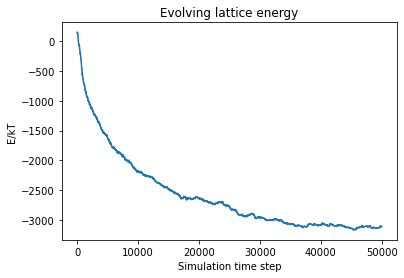

In [42]:
plt.plot(etot)
plt.title("Evolving lattice energy")
plt.xlabel("Simulation time step")
plt.ylabel("E/kT")
# Normalise energy
etot = etot/(boxlen*boxlen*J_over_kT)
print("The final total energy is:", etot[Nsteps], "J")

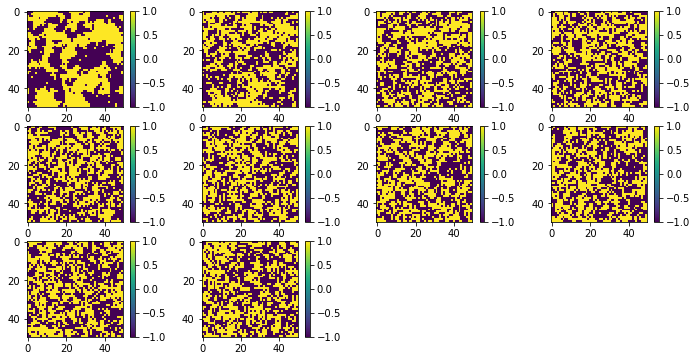

In [43]:
J_over_kT = 0.2
# Repeat simulation
boxlen = 50
B_over_kT = 0.0
#spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))
Nsteps = 50000
etot = np.zeros((Nsteps+1))
sum_neigh_spins = (np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
figIsing = plt.figure(figsize=(12,6))
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(boxlen, size=2)
    this_i2, this_j2 = rng.integers(boxlen, size=2)
    # Call swap function
    de = update_swap(this_i1,this_j1,this_i2,this_j2)
    # Calculate new spins and energy
    sum_neigh_spins = (np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    # Plot lattice every 5000 steps
    if i%5000==0:
        ax = figIsing.add_subplot(3,4,index)
        image = ax.imshow(spins,interpolation='none')
        plt.colorbar(mappable=image)
        index +=1 

## Conclusion


 As J is smaller, the coupling is smaller, which leads to less long-range order in the lattice. Thus the size of clustered spins remains small. While the bigger J value led to bigger areas with the same spin.